In [50]:
import pandas as pd
import sklearn as sk

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [3]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [5]:
fish_target = fish['Species'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()

In [12]:
ss.fit(train_input)

StandardScaler()

In [14]:
train_scaled = ss.transform(train_input)

In [15]:
test_scaled = ss.transform(test_input)

In [16]:
train_scaled

array([[ 9.19657820e-01,  6.09431747e-01,  8.10412209e-01,
         1.85194896e+00,  1.00075672e+00],
       [ 3.00412188e-01,  1.54653445e+00,  1.45316551e+00,
        -4.69816625e-01,  2.72917446e-01],
       [-1.08585360e+00, -1.68646987e+00, -1.70848587e+00,
        -1.70159849e+00, -2.00447580e+00],
       [-7.97341433e-01, -6.08801762e-01, -6.74869070e-01,
        -8.24805885e-01, -2.76314705e-01],
       [-7.12898847e-01, -7.30625113e-01, -7.00926637e-01,
        -8.02298036e-02, -7.03386897e-01],
       [-9.12746301e-01, -9.64900787e-01, -9.52816444e-01,
        -8.80171862e-01, -9.91535662e-01],
       [-7.97341433e-01, -7.02512032e-01, -7.61727625e-01,
        -7.82824547e-01, -5.44530184e-01],
       [ 6.38182533e-01,  5.62576612e-01,  7.32239510e-01,
         1.64473401e+00,  5.07057367e-01],
       [-7.41046376e-01, -6.74398951e-01, -7.35670058e-01,
        -6.12059278e-01, -5.57331377e-01],
       [-8.67710255e-01, -7.96222301e-01, -8.92015456e-01,
        -9.33586942e-01

In [17]:
test_scaled

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996],
       [ 1.70778862,  0.79685229,  0.98412932,  2.49283113,  1.31347159],
       [-1.08726098, -1.67709884, -1.70848587, -1.76175528, -2.01154694],
       [-0.60030873, -0.3089289 , -0.29269143, -0.43855288, -0.33056738],
       [-0.57779071, -0.36515506, -0.44035097, -0.52577528, -0.17219833],
       [ 2.41147684,  2.57734741,  2.4694106 ,  0.45038962,  1.54627043],
       [ 0.72262512,  0.46886634,  0.64538096,  1.38570915,  0.7798447 ],
       [ 1.70778862,  1.0779831 ,  1.06230202,  0.86222655,  1.2659243 ],
       [ 0.58188748,  0.32830094,  0.51509312,  1.62381742,  0.6898706 ],
       [-0.68475132, -0.7962223 , -0.7

In [18]:
from sklearn.linear_model import SGDClassifier

In [20]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

C:\Users\ds\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [21]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [22]:
sc.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [23]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [24]:
import numpy as np

In [30]:
sc = SGDClassifier(loss='log_loss', random_state=42)

In [26]:
train_score = []
test_score = []

In [27]:
classes = np.unique(train_target)

In [28]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [31]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

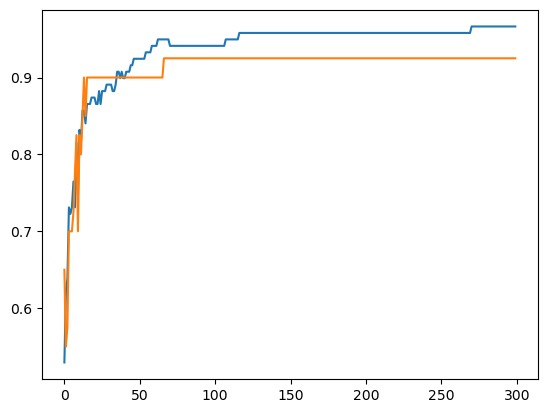

In [33]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)

In [34]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=100, random_state=42, tol=None)

In [35]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


# 보스턴 주택가격 예측 프로젝트

In [38]:
import numpy as np
import pandas as pd

In [42]:
boston = pd.read_csv('C:/Users/ds/Desktop/파이썬/예제/src/house_price.csv', header=0)

In [43]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [45]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
boston['PRICE'] = boston.MEDV

In [54]:
boston.rename(columns={'MEDV':'PRICE'}, inplace=True)

In [55]:
boston.shape

(506, 15)

In [57]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
boston_input = boston.drop(['PRICE'], axis=1, inplace=False)

In [60]:
boston_target = boston['PRICE']

In [61]:
boston_target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [62]:
train_input, test_input, train_target, test_target = train_test_split(
boston_input, boston_target, random_state=156)

In [63]:
train_input

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT.MEDV
450,6.71772,0.0,18.10,0,0.7130,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,0
35,0.06417,0.0,5.96,0,0.4990,5.933,68.2,3.3603,5,279,19.2,396.90,9.68,0
236,0.52058,0.0,6.20,1,0.5070,6.631,76.5,4.1480,8,307,17.4,388.45,9.54,0
69,0.12816,12.5,6.07,0,0.4090,5.885,33.0,6.4980,4,345,18.9,396.90,8.79,0
297,0.14103,0.0,13.92,0,0.4370,5.790,58.0,6.3200,4,289,16.0,396.90,15.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.12650,25.0,5.13,0,0.4530,6.762,43.4,7.9809,8,284,19.7,395.58,9.50,0
485,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,0
418,73.53410,0.0,18.10,0,0.6790,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,1


In [64]:
test_input

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT.MEDV
210,0.17446,0.0,10.59,1,0.489,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,0
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,0
264,0.55007,20.0,3.97,0,0.647,7.206,91.6,1.9301,5,264,13.0,387.89,8.10,1
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,396.90,19.37,0
234,0.44791,0.0,6.20,1,0.507,6.726,66.5,3.6519,8,307,17.4,360.20,8.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.04560,0.0,13.89,1,0.550,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,0
187,0.07875,45.0,3.44,0,0.437,6.782,41.1,3.7886,5,398,15.2,393.87,6.68,1
319,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73,0
293,0.08265,0.0,13.92,0,0.437,6.127,18.4,5.5027,4,289,16.0,396.90,8.58,0


In [65]:
lr = LinearRegression()

In [66]:
lr.fit(train_input, train_target)

LinearRegression()

In [68]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.8486344344170904
0.8185016229798406


In [70]:
price_predict = lr.predict(test_input)

In [75]:
mse = mean_squared_error(test_target, price_predict)
rmse = np.sqrt(mse)

In [79]:
print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))

MSE : 13.605, RMSE : 3.688


In [80]:
print(r2_score(test_target, price_predict))

0.8185016229798406


In [81]:
print('Y 절편값', lr.intercept_)
print('회귀계수값', np.round(lr.coef_,1))

Y 절편값 43.81019844000462
회귀계수값 [ -0.1  -0.    0.2   2.  -17.8   0.7  -0.   -0.9   0.2  -0.   -0.6   0.
  -0.5  12.9]


In [82]:
coef = pd.Series(data = np.round(lr.coef_,2), index = boston_input.columns)

In [83]:
coef

CRIM        -0.14
ZN          -0.00
INDUS        0.15
CHAS         2.00
NOX        -17.78
RM           0.70
AGE         -0.01
DIS         -0.88
RAD          0.23
TAX         -0.01
PTRATIO     -0.55
B            0.01
LSTAT       -0.48
CAT.MEDV    12.88
dtype: float64

In [84]:
coef.sort_values(ascending=False)

CAT.MEDV    12.88
CHAS         2.00
RM           0.70
RAD          0.23
INDUS        0.15
B            0.01
ZN          -0.00
AGE         -0.01
TAX         -0.01
CRIM        -0.14
LSTAT       -0.48
PTRATIO     -0.55
DIS         -0.88
NOX        -17.78
dtype: float64

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

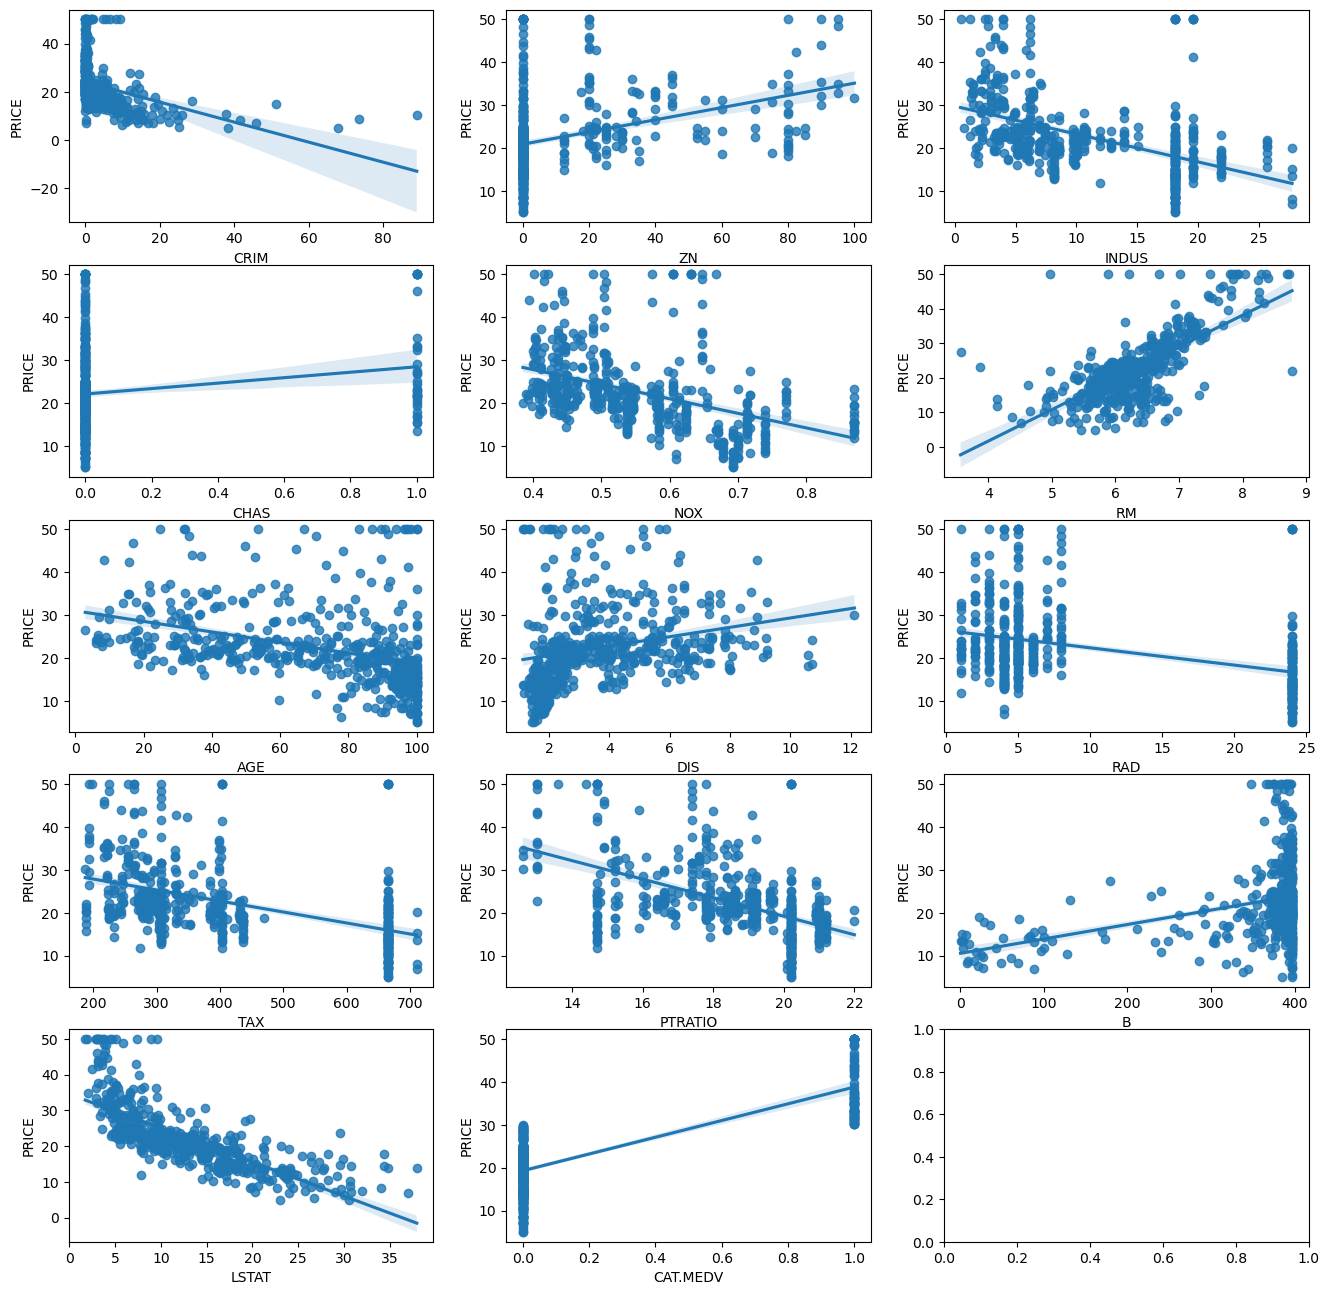

In [92]:
fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 5)
x_features = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX',
             'PTRATIO','B','LSTAT', 'CAT.MEDV']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='PRICE', data=boston, ax = axs[row][col])

## 항목에 따른 자동차 연비 예측하기

In [93]:
import numpy as np
import pandas as pd
data_df = pd.read_csv('C:/Users/ds/Desktop/파이썬/예제/src/auto-mpg.csv', header=0)

In [94]:
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [95]:
print('데이터 셋 크기 : ', data_df.shape)

데이터 셋 크기 :  (398, 9)


In [96]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [98]:
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)

In [99]:
data_df

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82
394,44.0,4,97.0,2130,24.6,82
395,32.0,4,135.0,2295,11.6,82
396,28.0,4,120.0,2625,18.6,82


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

In [103]:
Y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [104]:
X.head()

,cylinders,displacement,weight,acceleration,model_year
0,8,307.0,3504,12.0,70
1,8,350.0,3693,11.5,70
2,8,318.0,3436,11.0,70
3,8,304.0,3433,12.0,70
4,8,302.0,3449,10.5,70


In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.3, random_state=0)

In [106]:
X_train.shape

(278, 5)

In [108]:
X_test.shape

(120, 5)

In [109]:
lr = LinearRegression()

In [110]:
lr.fit(X_train, Y_train)

LinearRegression()

In [111]:
Y_predict = lr.predict(X_test)

In [113]:
print(Y_predict)

[12.68813886 24.89235692 11.77966226 20.713484   17.59974974 28.70463932
 31.8246109  24.79459783 13.3797074  28.03809202 33.95480562 32.517138
 21.28643713 26.32547953 16.29305741 32.16905355 30.04731897 29.90617451
 17.78110613 30.69577551 15.33574367 25.60299563 25.4723533  20.04730443
 30.70244174 26.79576507 32.20306918 31.95533215 30.42830733 18.19432511
 21.19981862 29.62938625 20.86352443 30.82503708 24.35511863 23.81034331
 21.45816755 16.77101118 31.95362794  8.06590693  9.60178767 13.8699291
 27.26165312 29.00102026 29.52364892 22.58571769 23.20233694 13.80533693
 23.86039376 28.12535283 31.40954528 26.70297991 15.34381889 25.01897062
 14.71481708  9.53883961 19.64272577 26.82491432 31.30917854 14.99268593
 20.64360774 25.57610711 22.45200894 19.72033566 10.7918702  11.42513414
  9.7023088  19.68724093 24.98227534  9.68717343 33.31781779 10.21150582
 20.84069925 19.27272978 22.433523   29.31460799 28.98886268 28.57314167
 29.70646598 16.24391797 12.49894224 27.56814445 31.31

In [114]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

In [116]:
print(mse, rmse)
print(r2_score(Y_test, Y_predict))

12.278239036609508 3.5040318258556824
0.8078579451877164


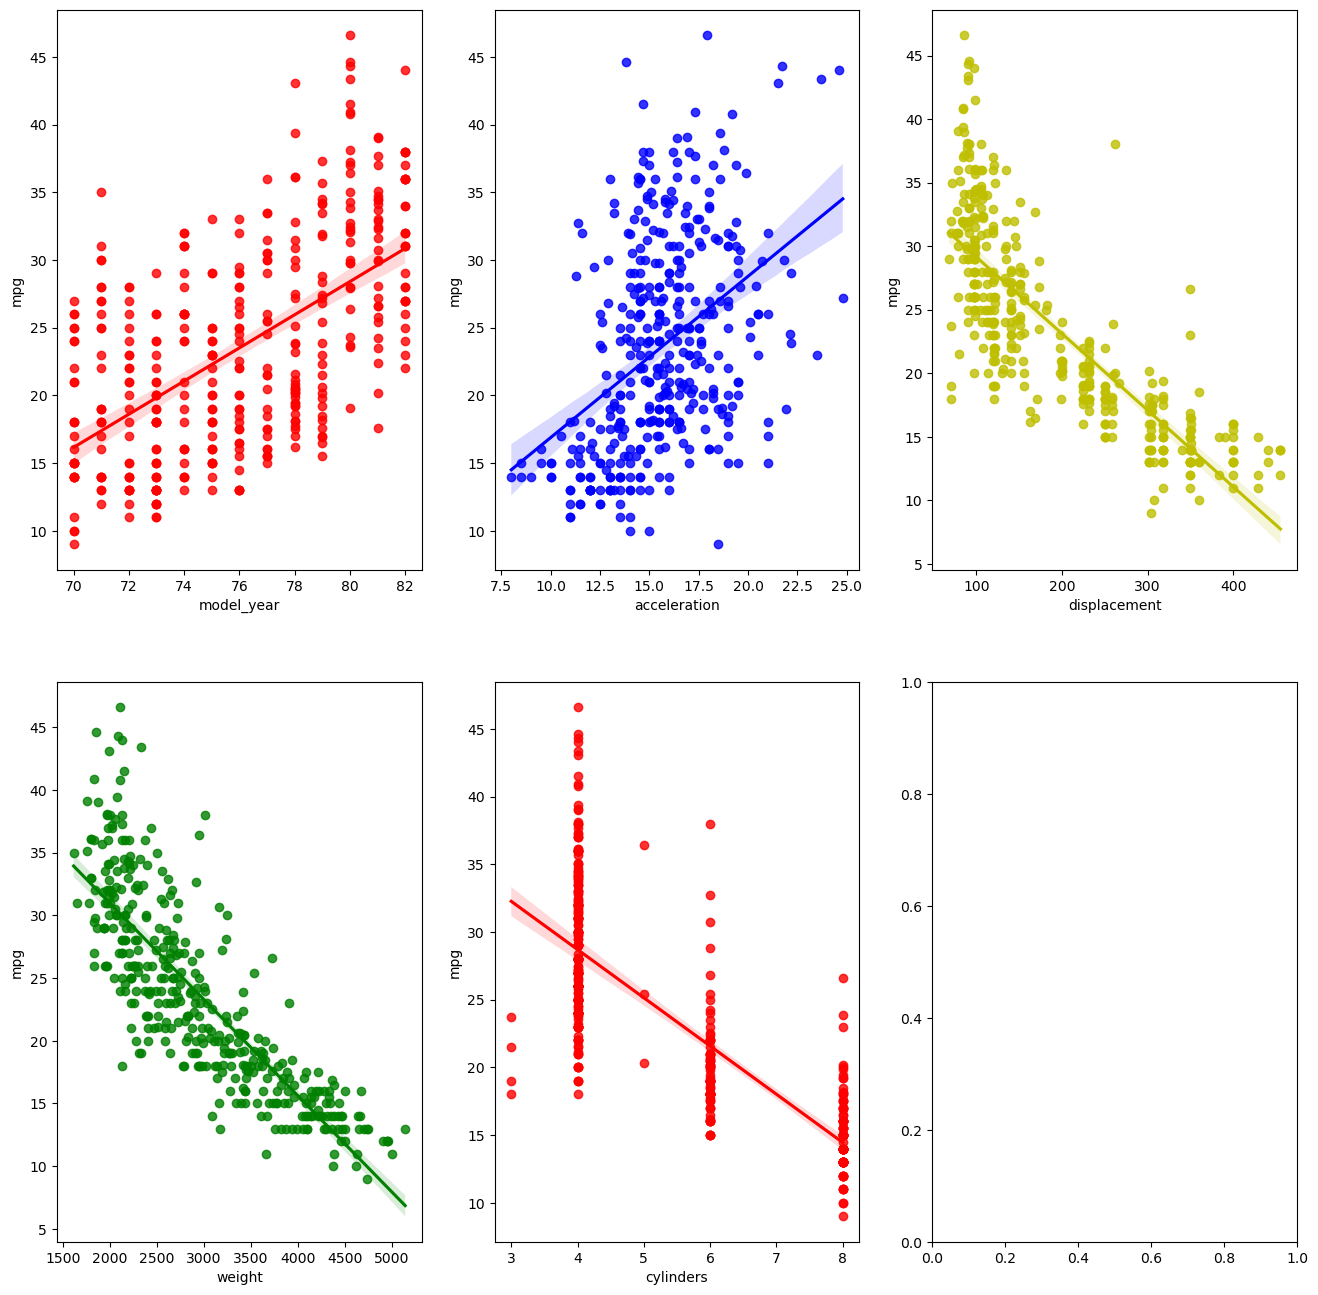

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 2)
x_features = ['model_year', 'acceleration','displacement','weight', 'cylinders']
plot_color = ['r','b','y','g','r']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='mpg', data=data_df, ax = axs[row][col], 
                color=plot_color[i])

In [123]:
print('차정보 입력 : ')
cylinder_1 = int(input("cylinder : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))
mpg_predict = lr.predict([[cylinder_1, displacement_1, weight_1, 
                           acceleration_1, model_year_1]])

print('연비는 : %.2f' % mpg_predict)

차정보 입력 : 
cylinder : 9
displacement : 400
weight : 1500
acceleration : 20
model_year : 99
연비는 : 52.87


C:\Users\ds\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 정적웹페이지 크롤링

In [125]:
from bs4 import BeautifulSoup
import urllib.request

In [136]:
result= [] 

In [137]:
for page in range(1,52):
    hollys_url = 'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=%d&sido=&gugun=&store=' % page
#    print(hollys_url)
    html = urllib.request.urlopen(hollys_url)
    soupHollys = BeautifulSoup(html, 'html.parser')
    tag_tbody = soupHollys.find('tbody')
    for store in tag_tbody.find_all('tr'):
        if len(store) <= 3:
            break
        store_td = store.find_all('td')
        store_name = store_td[1].string
        store_sido = store_td[0].string
        store_address = store_td[3].string
        store_phone = store_td[5].string
        
        result.append([store_name]+[store_sido]+[store_address]+[store_phone])
        

In [139]:
result[:10]

[['부산사상광장점',
  '부산 사상구',
  '부산광역시 사상구 광장로 22 (괘법동) 2층 사상구 괘법동 565-2',
  '051-322-4117'],
 ['분당파크타운점',
  '경기 성남시 분당구',
  '경기도 성남시 분당구 내정로 170 (수내동, 동신파크빌딩) .',
  '031-713-8570'],
 ['하남덕풍점', '경기 하남시', '경기도 하남시 덕풍북로 2 (덕풍동) .', '070-4791-4731'],
 ['대전오류점', '대전 중구', '대전광역시 중구 계룡로 876 메종드메디컬빌딩 104호, 202호 .', '042-522-3141'],
 ['계룡대점',
  '충남 계룡시',
  '충청남도 계룡시 신도안면 신도안1길 43 (계룡스포츠센터) 계룡스포츠센터 1층',
  '042-551-5508'],
 ['구미오태DT점', '경북 구미시', '경상북도 구미시 오태동 609 .', '054-461-0348'],
 ['화정DI점', '경기 고양시 덕양구', '경기도 고양시 덕양구 화신로 254 (화정동) ', '031-971-4097'],
 ['부산광복점', '부산 중구', '부산광역시 중구 광복로 70 (광복동2가) .', '051-253-8033'],
 ['양평북한강DI점', '경기 양평군', '경기도 양평군 양서면 양수로118번길 29 할리스', '031-8079-7090'],
 ['완주삼봉점', '전북 완주군', '전라북도 완주군 삼례읍 신기길 5-3 수계리 1212-4', '063-261-2003']]

In [140]:
len(result)

504

In [141]:
result[0]

['부산사상광장점',
 '부산 사상구',
 '부산광역시 사상구 광장로 22 (괘법동) 2층 사상구 괘법동 565-2',
 '051-322-4117']

In [142]:
store_td

[<td class="noline center_t">서울 서대문구</td>,
 <td class="center_t"><a href="#" onclick="javascript:storeView(1); return false;">신촌점</a></td>,
 <td class="center_t tdp0">영업중</td>,
 <td class="center_t"><a href="#" onclick="javascript:storeView(1); return false;">서울특별시 서대문구 연세로 34 (창천동 31-12)  할리스</a></td>,
 <td class="center_t">
 </td>,
 <td class="center_t">02-393-2004</td>]

In [145]:
store_td[0].string

'서울 서대문구'

In [146]:
store_td[1].string

'신촌점'

In [147]:
holly_tbl = pd.DataFrame(result, columns=('store', 'sido-gu', 'address', 'phone'))

In [148]:
holly_tbl.head()

,store,sido-gu,address,phone
0,부산사상광장점,부산 사상구,부산광역시 사상구 광장로 22 (괘법동) 2층 사상구 괘법동 565-2,051-322-4117
1,분당파크타운점,경기 성남시 분당구,"경기도 성남시 분당구 내정로 170 (수내동, 동신파크빌딩) .",031-713-8570
2,하남덕풍점,경기 하남시,경기도 하남시 덕풍북로 2 (덕풍동) .,070-4791-4731
3,대전오류점,대전 중구,"대전광역시 중구 계룡로 876 메종드메디컬빌딩 104호, 202호 .",042-522-3141
4,계룡대점,충남 계룡시,충청남도 계룡시 신도안면 신도안1길 43 (계룡스포츠센터) 계룡스포츠센터 1층,042-551-5508


In [149]:
holly_tbl

,store,sido-gu,address,phone
0,부산사상광장점,부산 사상구,부산광역시 사상구 광장로 22 (괘법동) 2층 사상구 괘법동 565-2,051-322-4117
1,분당파크타운점,경기 성남시 분당구,"경기도 성남시 분당구 내정로 170 (수내동, 동신파크빌딩) .",031-713-8570
2,하남덕풍점,경기 하남시,경기도 하남시 덕풍북로 2 (덕풍동) .,070-4791-4731
3,대전오류점,대전 중구,"대전광역시 중구 계룡로 876 메종드메디컬빌딩 104호, 202호 .",042-522-3141
4,계룡대점,충남 계룡시,충청남도 계룡시 신도안면 신도안1길 43 (계룡스포츠센터) 계룡스포츠센터 1층,042-551-5508
...,...,...,...,...
499,합정역점,서울 마포구,서울특별시 마포구 양화로 36 (합정동 374-1) 할리스,02-6204-1234
500,부산달맞이점,부산 해운대구,"부산광역시 해운대구 달맞이길 199, 2~3층 (중동 1488-14) 할리스",051-731-3410
501,신림점,서울 관악구,서울특별시 관악구 신림로 353-1,02-877-0019
502,태평로점,서울 중구,"서울특별시 중구 세종대로 64, 해남빌딩 1층 (태평로2가 70-5) 할리스",02-755-7795


In [151]:
holly_tbl.to_csv('C:/Users/ds/Desktop/파이썬/예제/src/holls.csv', encoding='euc-kr', mode='w', index=True)

## 동적웹페이지 크롤링

In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
from selenium import webdriver

In [7]:
wd = webdriver.Chrome()
# https://www.coffeebeankorea.com/

In [20]:
from bs4 import BeautifulSoup

In [21]:
wd.get('https://www.coffeebeankorea.com/store/store.asp')

In [22]:
wd.execute_script('storePop2(50)')

In [23]:
html = wd.page_source

In [24]:
html

'<html class=" js canvas canvastext no-touch geolocation postmessage indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderradius boxshadow textshadow opacity cssanimations cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg" lang="ko-KR" style=""><!--<![endif]--><head><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-84W93E2CP2&amp;cx=c&amp;_slc=1"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-EKXL62KETE&amp;cx=c&amp;_slc=1"></script>\n\n\t<meta charset="UTF-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge, chrome=1">\n\n<title>STORE | COFFEE BEAN KOREA</title><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scal

In [25]:
soupCB1 = BeautifulSoup(html, 'html.parser')

In [26]:
soupCB1

<html class="js canvas canvastext no-touch geolocation postmessage indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderradius boxshadow textshadow opacity cssanimations cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg" lang="ko-KR" style=""><!--<![endif]--><head><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-84W93E2CP2&amp;cx=c&amp;_slc=1" type="text/javascript"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-EKXL62KETE&amp;cx=c&amp;_slc=1" type="text/javascript"></script>
<meta charset="utf-8"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
<title>STORE | COFFEE BEAN KOREA</title><meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, u

In [27]:
store_name_h2 = soupCB1.select("div.store_txt > h2")

In [28]:
store_name_h2

[<h2>방이점</h2>]

In [29]:
store_name = store_name_h2[0].string

In [30]:
store_name

'방이점'

In [31]:
store_info = soupCB1.select("div.store_txt > table.store_table > tbody > tr > td")

In [32]:
store_info

[<td>매일 7:00 - 24:00</td>,
 <td>주차불가</td>,
 <td>서울시 송파구 오금로 11길 7  <!--span class="lot">(서울시 송파구 오금로 11길 7)</span--></td>,
 <td>02-415-5561</td>,
 <td class="hallcake">홀케익 당일 수령가능</td>]

In [33]:
store_address_list = list(store_info[2])

In [34]:
store_address_list

['서울시 송파구 오금로 11길 7  ', 'span class="lot">(서울시 송파구 오금로 11길 7)</span']

In [35]:
store_address = store_address_list[0]

In [36]:
store_address

'서울시 송파구 오금로 11길 7  '

In [37]:
store_phone = store_info[3].string

In [38]:
store_phone

'02-415-5561'

# 커피빈 크롤링 전체

In [46]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime
import sys

from selenium import webdriver
import time

In [61]:
def CoffeeBean_store(result):
    CoffeeBean_URL = 'https://www.coffeebeankorea.com/store/store.asp'
    wd = webdriver.Chrome()
    
    for i in range(50,52):
        wd.get(CoffeeBean_URL)
        time.sleep(2)
        try:
            wd.execute_script('storePop2(%d)' % i)
            time.sleep(2)
            html = wd.page_source
            soupCB = BeautifulSoup(html, 'html.parser')
            store_name_h2 = soupCB.select("div.store_txt > h2")
            store_name = store_name_h2[0].string
         #   print(store_name)
            store_info = soupCB.select("div.store_txt > table.store_table > tbody > tr > td")
            store_address_list = list(store_info[2])
            store_address = store_address_list[0]
            store_phone = store_info[3].string
            result.append([store_name]+[store_address]+[store_phone])
        except:
            continue
    return 

def main():
    result = []
    print('coffeebean crawling')
    CoffeeBean_store(result)
    CB_tbl = pd.DataFrame(result, columns = ('store', 'address', 'phone'))
    CB_tbl.to_csv('C:/Users/ds/Desktop/파이썬/예제/src/coffeebean2.csv', 
                  encoding='euc-kr', mode = 'w', index=True)

if __name__ == '__main__':
        main()

wd.quit()
sys.exit("크롤링 종료!!")

coffeebean crawling
방이점
매봉역점


SystemExit: 크롤링 종료!!

In [52]:
CB_tbl

[]